In [12]:
from typing import List, Tuple, Dict, Any, Optional
from pandarallel import pandarallel
import os
import re
import sys
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [13]:
# CONFIGURATION
settings = [
    {
        "name": "size_15_ops_150",
        "path": "../program_bank/v032/2025_02_14__21_50",
        "title": "15 Qubits (150 ops)",
        "color": "black",
        "n_rounds": 5,
        "n_initial_programs": 100,
    },
    {
        "name": "size_25_ops_50",
        "path": "../program_bank/v028/2025_02_14__23_36",
        "title": "25 Qubits (50 ops)",
        "color": "blue",
        "n_rounds": 5,
        "n_initial_programs": 1000,
    },
    {
        "name": "size_30_ops_60",
        "path": "../program_bank/v029/2025_02_14__23_36",
        "title": "30 Qubits (60 ops)",
        "color": "dodgerblue",
        "n_rounds": 5,
        "n_initial_programs": 1000,
    },
    {
        "name": "size_40_ops_80",
        "path": "../program_bank/v030/2025_02_14__23_36",
        "title": "40 Qubits (80 ops)",
        "color": "lightblue",
        "n_rounds": 5,
        "n_initial_programs": 1000,
    },
    {
        "name": "size_50_ops_100",
        "path": "../program_bank/v031/2025_02_14__21_49",
        "title": "50 Qubits (100 ops)",
        "color": "darkblue",
        "n_rounds": 5,
        "n_initial_programs": 100,
    },
    {
        "name": "size_60_ops_120",
        "path": "../program_bank/v033/2025_02_14__22_58",
        "title": "60 Qubits (120 ops)",
        "color": "purple",
        "n_rounds": 5,
        "n_initial_programs": 100,
    },
    {
        "name": "size_100_ops_200",
        "path": "../program_bank/v034/2025_02_14__22_58",
        "title": "100 Qubits (200 ops)",
        "color": "green",
        "n_rounds": 5,
        "n_initial_programs": 100,
    },
    {
        "name": "size_150_ops_300",
        "path": "../program_bank/v035/2025_02_14__22_58",
        "title": "150 Qubits (300 ops)",
        "color": "red",
        "n_rounds": 5,
        "n_initial_programs": 100,
    },
    {
        "name": "iter_2_size_11_ops_15",
        "path": "../program_bank/v026_iter_2/2025_02_13__19_07",
        "title": "Iteration 2 (11-Q, 15-OP)",
        "color": "red",
        "n_rounds": 2,
        "n_initial_programs": 5000
    },
    {
        "name": "iter_5_size_11_ops_15",
        "path": "../program_bank/v026_iter_5/2025_02_13__19_07",
        "title": "Iteration 5 (11-Q, 15-OP)",
        "color": "green",
        "n_rounds": 5,
        "n_initial_programs": 2000
    },
    {
        "name": "iter_10_size_11_ops_15",
        "path": "../program_bank/v026_iter_10/2025_02_13__19_07",
        "title": "Iteration 10 (11-Q, 15-OP)",
        "color": "purple",
        "n_rounds": 10,
        "n_initial_programs": 1000
    }
]

In [14]:

def read_metadata(setting: Dict[str, Any]) -> List[Dict[str, Any]]:
    path = setting["path"]
    records = []
    file_path = os.path.join(path, "_qite_stats.txt")
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            for line in file:
                record = json.loads(line)
                record.update(setting)
                records.append(record)
    return records


metadata_records = []
for setting in settings:
    metadata_records.extend(read_metadata(setting))

metadata_dict = {"records": metadata_records}
df_metadata = pd.DataFrame(metadata_records)
df_metadata.head()

round  n_program             name                                    path  \
0      1         41  size_15_ops_150  ../program_bank/v032/2025_02_14__21_50   
1      2         29  size_15_ops_150  ../program_bank/v032/2025_02_14__21_50   
2      3         28  size_15_ops_150  ../program_bank/v032/2025_02_14__21_50   
3      4         27  size_15_ops_150  ../program_bank/v032/2025_02_14__21_50   
4      5         27  size_15_ops_150  ../program_bank/v032/2025_02_14__21_50   

                 title  color  n_rounds  n_initial_programs  
0  15 Qubits (150 ops)  black         5                 100  
1  15 Qubits (150 ops)  black         5                 100  
2  15 Qubits (150 ops)  black         5                 100  
3  15 Qubits (150 ops)  black         5                 100  
4  15 Qubits (150 ops)  black         5                 100

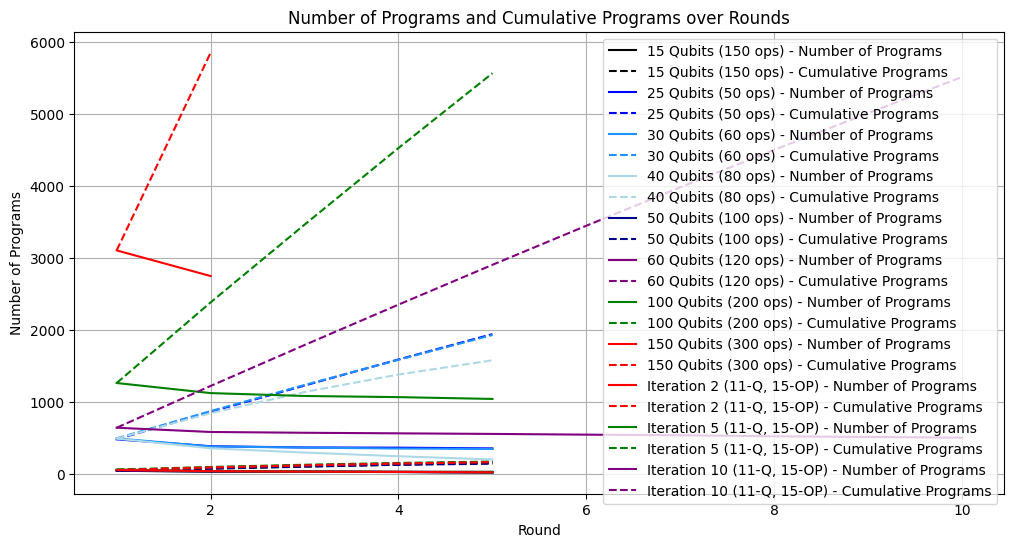

In [15]:
def plot_programs(df_metadata: pd.DataFrame, names: List[str]) -> None:
    plt.figure(figsize=(12, 6))

    for name in names:
        df_name = df_metadata[df_metadata["name"] == name].copy()
        title = df_name["title"].iloc[0]
        color = df_name["color"].iloc[0]
        plt.plot(df_name['round'], df_name['n_program'],
                 label=f'{title} - Number of Programs', color=color)
        df_name['cumulative_programs'] = df_name['n_program'].cumsum()
        plt.plot(
            df_name['round'],
            df_name['cumulative_programs'],
            label=f'{title} - Cumulative Programs', color=color,
            linestyle='--')

    plt.xlabel('Round')
    plt.ylabel('Number of Programs')
    plt.title('Number of Programs and Cumulative Programs over Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()


# Main execution
df = df_metadata.copy()

plot_programs(
    df,
    names=[
        setting["name"]
        for setting in settings
    ])

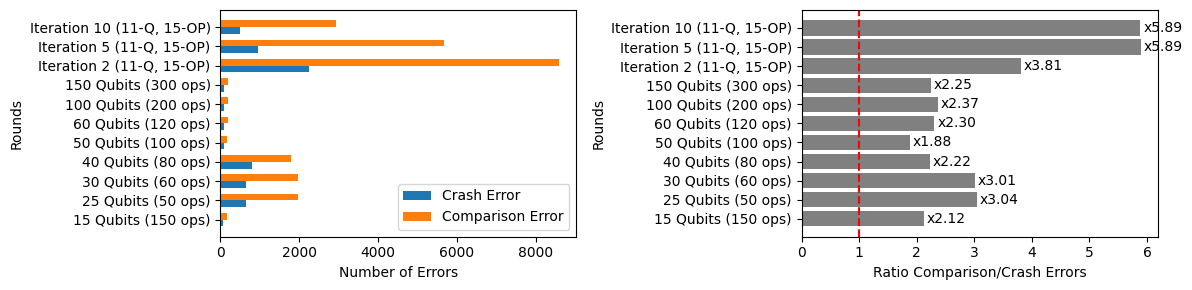

In [16]:
def count_files_in_folder(folder_path: str) -> int:
    if os.path.exists(folder_path):
        return len([name for name in os.listdir(folder_path)
                    if os.path.isfile(os.path.join(folder_path, name))])
    return 0


error_counts = []
comparison_counts = []
labels = []

for setting in settings:
    error_folder = os.path.join(setting["path"], "error")
    comparison_folder = os.path.join(setting["path"], "comparison")

    error_count = count_files_in_folder(error_folder)
    comparison_count = count_files_in_folder(comparison_folder)

    error_counts.append(error_count)
    comparison_counts.append(comparison_count)
    labels.append(f'{setting["title"]}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

y = np.arange(len(labels))
height = 0.35

# First plot
rects1 = ax1.barh(y - height/2, error_counts, height, label='Crash Error')
rects2 = ax1.barh(y + height/2, comparison_counts,
                  height, label='Comparison Error')

ax1.set_ylabel('Rounds')
ax1.set_xlabel('Number of Errors')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
ax1.legend()

# Calculate ratios
ratios = [comp / err if err != 0 else 0 for comp,
          err in zip(comparison_counts, error_counts)]
# Second plot
ax2.barh(labels, ratios, color='gray')
ax2.set_ylabel('Rounds')
ax2.set_xlabel('Ratio Comparison/Crash Errors')
ax2.axvline(1, color='red', linestyle='--')

# Add value on top of each column
for i, v in enumerate(ratios):
    ax2.text(v + 0.05, i, f'x{v:.2f}', ha='left', va='center')

fig.tight_layout()
plt.show()

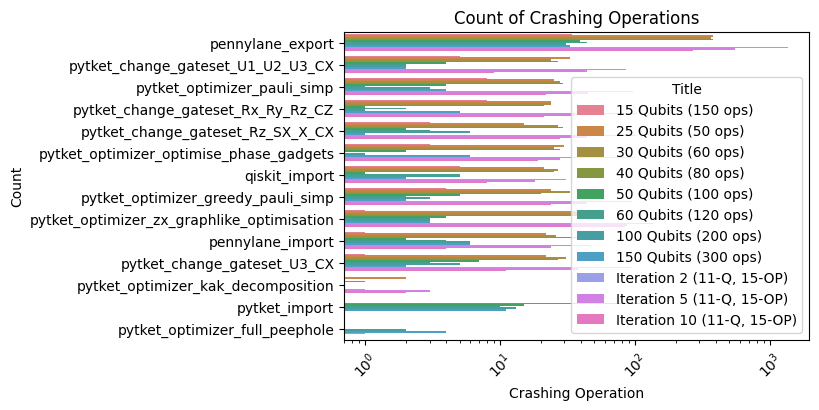

In [17]:
import glob
from multiprocessing import Pool


def read_json_files(path: str) -> List[Dict[str, Any]]:
    json_files = glob.glob(os.path.join(path, "*.json"))
    records = []
    with Pool() as pool:
        results = pool.map(read_json_file, json_files)
    records.extend(results)
    return records


def read_json_file(file: str) -> Dict[str, Any]:
    with open(file, 'r') as f:
        data = json.load(f)
        data['provenance'] = os.path.dirname(file)
        data['filename'] = os.path.basename(file)
    return data


# Read JSON files in parallel
all_records = []
for setting in settings:
    error_folder = os.path.join(setting["path"], "error")
    all_records.extend(read_json_files(error_folder))

# Concatenate all dataframes
error_df = pd.DataFrame(all_records)

# Plot the count plot for crashing_operation column
plt.figure(figsize=(6, 4))
sns.countplot(
    data=error_df,
    y='crashing_operation',
    hue='provenance',
)

# Replace the legend using the title in the settings
handles, labels = plt.gca().get_legend_handles_labels()
title_map = {setting['path']: setting['title'] for setting in settings}
new_labels = [title_map[str(Path(label).parent)] for label in labels]
plt.legend(handles, new_labels, title='Title')

plt.title('Count of Crashing Operations')
plt.xlabel('Crashing Operation')
plt.xscale('log')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Filter the record with crashing_operation as 'pytket_optimizer_kak_decomposition'
# TARGET_OPT = 'pytket_optimizer_kak_decomposition'
# TARGET_OPT = 'pytket_optimizer_full_peephole'
TARGET_OPT = 'pennylane_export'
record = error_df[error_df['crashing_operation']
                  == TARGET_OPT]

# Print the record in a pretty format
if not record.empty:
    print(json.dumps(record.to_dict(orient='records'), indent=4))
else:
    print(f"No record found with crashing_operation {TARGET_OPT}")

[
    {
        "error": "Operation QubitUnitary not supported by the QASM serializer",
        "traceback": "Traceback (most recent call last):\n  File \"/home/paltenmo/.conda/envs/crosspl/lib/python3.10/site-packages/pennylane/tape/qscript.py\", line 1291, in to_openqasm\n    gate = OPENQASM_GATES[op.name]\nKeyError: 'QubitUnitary'\n\nThe above exception was the direct cause of the following exception:\n\nTraceback (most recent call last):\n  File \"/home/paltenmo/projects/crossplatform/qite/base/primitives.py\", line 34, in run\n    return self.execute(*args, **kwargs)\n  File \"/home/paltenmo/projects/crossplatform/qite/base/primitives.py\", line 98, in execute\n    return self.export(qc_obj, path, *args, **kwargs)\n  File \"/home/paltenmo/projects/crossplatform/qite/processors/pennylane_processor.py\", line 48, in export\n    raise e\n  File \"/home/paltenmo/projects/crossplatform/qite/processors/pennylane_processor.py\", line 42, in export\n    qasm_str = self._export_to_qasm_wit

In [19]:
def read_all_json_files(base_path: str) -> pd.DataFrame:
    subfolders = ["metadata", "comparison", "error"]
    all_records = []

    with Pool() as pool:
        for subfolder in subfolders:
            folder_path = os.path.join(base_path, subfolder)
            if os.path.exists(folder_path):
                results = pool.map(
                    read_json_file, glob.glob(
                        os.path.join(folder_path, "*.json")))
                print(results[0])
                all_records.extend(results)

    return pd.DataFrame(all_records)


# Read JSON files from all subfolders and store them in a single DataFrame for all settings
all_combined_df = pd.DataFrame()

for setting in settings:
    base_path = setting["path"]
    combined_df = read_all_json_files(base_path)
    for key, value in setting.items():
        combined_df[key] = value
    all_combined_df = pd.concat(
        [all_combined_df, combined_df],
        ignore_index=True)

all_combined_df['transformer_functions'] = all_combined_df['transformer_functions'].apply(
    lambda x: x[0] if isinstance(x, list) and x else None)
all_combined_df['transformation_time'] = all_combined_df['transformation_time'].apply(
    lambda x: x[0] if isinstance(x, list) and x else None)

all_combined_df.head()

{'input_qasm': 'program_bank/v032/2025_02_14__21_50/0000082_qite_ab1fb5.qasm', 'platform': 'pytket', 'importer_function': 'pytket_import', 'transformer_functions': ['pytket_optimizer_euler_angle_reduction'], 'exporter_function': 'pytket_export', 'importer_time': 0.08691692352294922, 'transformation_time': [0.038716793060302734], 'exporter_time': 0.09976053237915039, 'output_qasm': 'program_bank/v032/2025_02_14__21_50/0000082_qite_878a9b.qasm', 'provenance': '../program_bank/v032/2025_02_14__21_50/metadata', 'filename': '0000082_qite_878a9b.json'}
{'qasms': [{'filename': '0000006_qite_fb20e5.qasm', 'provenance': 'pennylane', 'provenance_tree': [{'input_qasm': 'program_bank/v032/2025_02_14__21_50/0000006_qite_a6ee03.qasm', 'platform': 'pennylane', 'importer_function': 'pennylane_import', 'transformer_functions': ['pennylane_optimizer_undo_swaps'], 'exporter_function': 'pennylane_export', 'importer_time': 0.011010885238647461, 'transformation_time': [3.743171691894531e-05], 'exporter_time

input_qasm   platform  \
0  program_bank/v032/2025_02_14__21_50/0000082_qi...     pytket   
1  program_bank/v032/2025_02_14__21_50/0000071_qi...     qiskit   
2  program_bank/v032/2025_02_14__21_50/0000020_qi...  pennylane   
3  program_bank/v032/2025_02_14__21_50/0000009_qi...  pennylane   
4  program_bank/v032/2025_02_14__21_50/0000045_17...     qiskit   

  importer_function                      transformer_functions  \
0     pytket_import     pytket_optimizer_euler_angle_reduction   
1     qiskit_import          qiskit_change_gateset_u1_u2_u3_cx   
2  pennylane_import        pennylane_optimizer_cancel_inverses   
3  pennylane_import  pennylane_optimizer_combine_global_phases   
4     qiskit_import                qiskit_change_gateset_u3_cx   

  exporter_function  importer_time  transformation_time  exporter_time  \
0     pytket_export       0.086917             0.038717       0.099761   
1     qiskit_export       0.005797             0.067486       0.011674   
2  pennylane_export       0.011369             0.000052       0.177178   
3  pennylane_export       0.021300             0.000052       0.341416   
4     qiskit_export       0.001867             0.081127       0.012143   

                                         output_qasm  \
0  program_bank/v032/2025_02_14__21_50/0000082_qi...   
1  program_bank/v032/2025_02_14__21_50/0000071_qi...   
2  program_bank/v032/2025_02_14__21_50/0000020_qi...   
3  program_bank/v032/2025_02_14__21_50/0000009_qi...   
4  program_bank/v032/2025_02_14__21_50/0000045_qi...   

                                        provenance  ... error traceback  \
0  ../program_bank/v032/2025_02_14__21_50/metadata  ...   NaN       NaN   
1  ../program_bank/v032/2025_02_14__21_50/metadata  ...   NaN       NaN   
2  ../program_bank/v032/2025_02_14__21_50/metadata  ...   NaN       NaN   
3  ../program_bank/v032/2025_02_14__21_50/metadata  ...   NaN       NaN   
4  ../program_bank/v032/2025_02_14__21_50/metadata  ...   NaN       NaN   

  timestamp  crashing_operation             name  \
0       NaN                 NaN  size_15_ops_150   
1       NaN                 NaN  size_15_ops_150   
2       NaN                 NaN  size_15_ops_150   
3       NaN                 NaN  size_15_ops_150   
4       NaN                 NaN  size_15_ops_150   

                                     path                title  color  \
0  ../program_bank/v032/2025_02_14__21_50  15 Qubits (150 ops)  black   
1  ../program_bank/v032/2025_02_14__21_50  15 Qubits (150 ops)  black   
2  ../program_bank/v032/2025_02_14__21_50  15 Qubits (150 ops)  black   
3  ../program_bank/v032/2025_02_14__21_50  15 Qubits (150 ops)  black   
4  ../program_bank/v032/2025_02_14__21_50  15 Qubits (150 ops)  black   

  n_rounds n_initial_programs  
0        5                100  
1        5                100  
2        5                100  
3        5                100  
4        5                100  

[5 rows x 24 columns]

In [20]:
# df = all_combined_df.copy()
# # keep only not nan comparator_time
# df = df[~df['comparator_time'].isna()]
# df.head()

/tmp/ipykernel_1832483/176964078.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


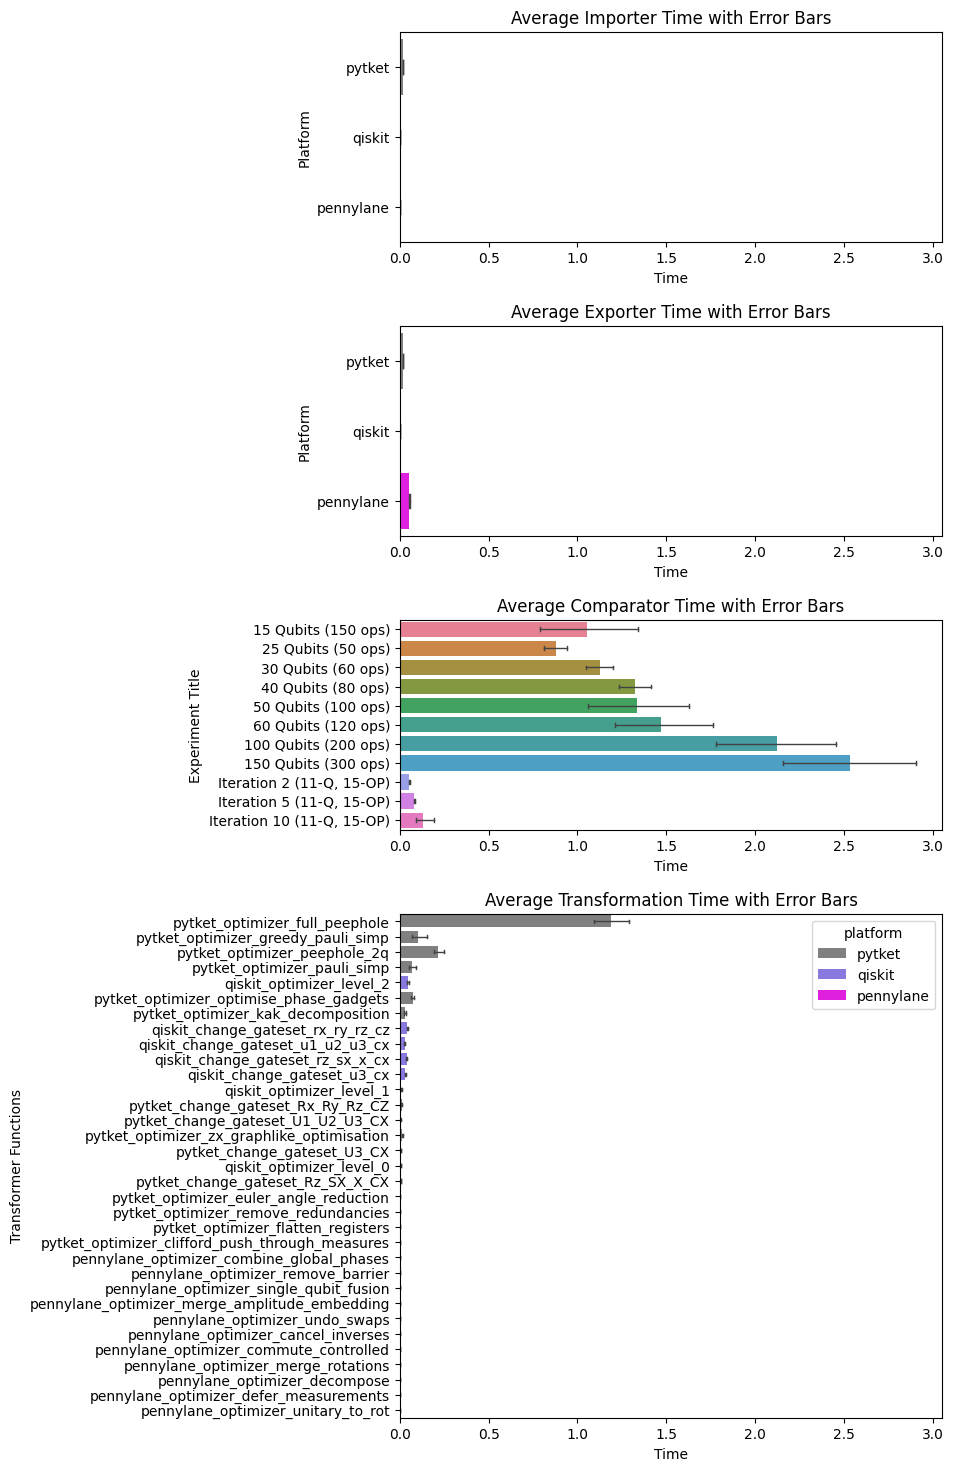

In [21]:
from matplotlib.gridspec import GridSpec
df = all_combined_df.copy()
# df = df[df["name"] == "wide_circuits"]

# Define the style dictionary
style_dict = {
    'capsize': 0.2,
    'err_kws': {'linewidth': 1},
}

# Define a color palette for platforms
platform_palette = {
    'pytket': 'gray',
    'pennylane': 'magenta',
    'qiskit': 'mediumslateblue'
}

# Create a figure with GridSpec
fig = plt.figure(figsize=(7, 18))
gs = GridSpec(5, 1, figure=fig, hspace=0.4)

# Plot for importer time
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(
    data=df,
    x='importer_time',
    y='platform',
    hue='platform',
    ax=ax1,
    palette=platform_palette,
    legend=False,
    **style_dict
)
ax1.set_title('Average Importer Time with Error Bars')
ax1.set_xlabel('Time')
ax1.set_ylabel('Platform')

# Plot for exporter time
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
sns.barplot(
    data=df,
    x='exporter_time',
    y='platform',
    hue='platform',
    ax=ax2,
    palette=platform_palette,
    legend=False,
    **style_dict
)
ax2.set_title('Average Exporter Time with Error Bars')
ax2.set_xlabel('Time')
ax2.set_ylabel('Platform')

# Plot for comparator time
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
sns.barplot(
    data=df,
    x='comparator_time',
    y='title',
    hue='title',
    ax=ax3,
    # palette=platform_palette,
    legend=False,
    **style_dict
)
ax3.set_title('Average Comparator Time with Error Bars')
ax3.set_xlabel('Time')
ax3.set_ylabel('Experiment Title')

# Plot for transformation time with hue for platform
ax4 = fig.add_subplot(gs[3:, 0], sharex=ax1)
df_sorted = df.sort_values(by='transformation_time', ascending=False)
sns.barplot(
    data=df_sorted,
    x='transformation_time',
    y='transformer_functions',
    hue='platform',
    ax=ax4,
    palette=platform_palette,
    **style_dict
)
ax4.set_title('Average Transformation Time with Error Bars')
ax4.set_xlabel('Time')
ax4.set_ylabel('Transformer Functions')
# ax4.set_xscale('log')

plt.tight_layout()
plt.show()

name
iter_10_size_11_ops_15          NaN
iter_2_size_11_ops_15           NaN
iter_5_size_11_ops_15           NaN
size_100_ops_200          32.291667
size_150_ops_300          42.307692
size_15_ops_150           14.193548
size_25_ops_50             8.772819
size_30_ops_60            13.670886
size_40_ops_80            18.294052
size_50_ops_100           13.580247
size_60_ops_120           18.681319
Name: count, dtype: float64


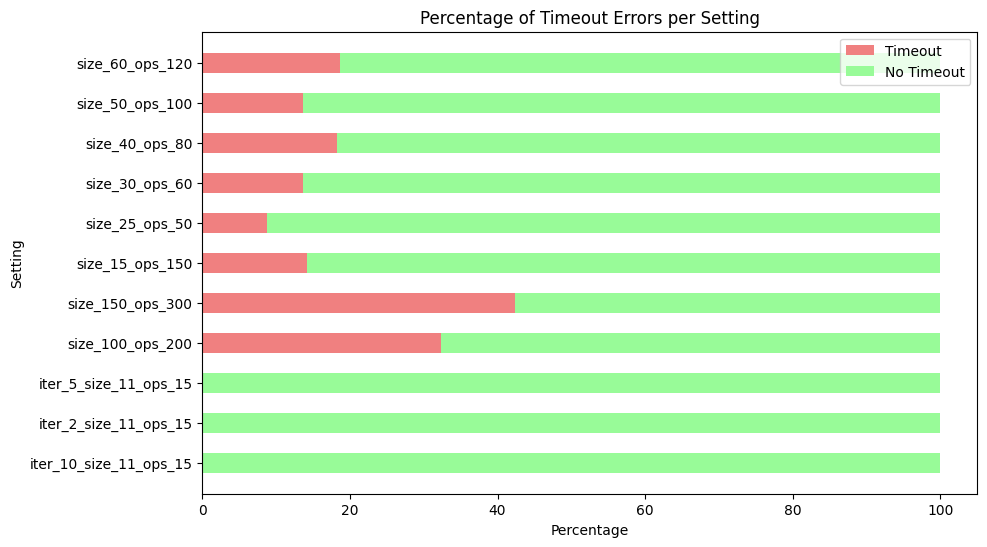

In [22]:
df = all_combined_df.copy()

# Filter the error_df for comparator errors with equivalence = 'timeout'
timeout_errors = df[df['equivalence'] == 'timeout']

# Count the number of timeout errors for each setting
timeout_counts = timeout_errors['name'].value_counts()

# Filter the error_df for comparator lines
comparator_lines = df[df['provenance'].str.contains('comparison')]

# Count the number of comparator lines for each setting
comparator_counts = comparator_lines['name'].value_counts()

# Calculate the percentage of timeout errors for each setting
timeout_percentages = (timeout_counts / comparator_counts) * 100
print(timeout_percentages)

# Create a DataFrame to display the results
records = []
for name, percentage in timeout_percentages.items():
    records.append({
        'name': name,
        'timeout_percentage': percentage,
        'timeout_count': timeout_counts.get(name, 0),
        'comparator_count': comparator_counts.get(name, 0)
    })
df_timeout_perc = pd.DataFrame(records)

# Plot a bar plot to show the percentage of timeout as red and the rest as green
df_timeout_perc = df_timeout_perc.fillna(
    0)  # Fill NaN values with 0 for plotting

plt.figure(figsize=(10, 6))
bar_width = 0.5
bar1 = plt.barh(
    df_timeout_perc['name'],
    df_timeout_perc['timeout_percentage'],
    color='lightcoral', label='Timeout', height=bar_width)
bar2 = plt.barh(
    df_timeout_perc['name'],
    100 - df_timeout_perc['timeout_percentage'],
    left=df_timeout_perc['timeout_percentage'],
    color='palegreen', label='No Timeout', height=bar_width)

plt.xlabel('Percentage')
plt.ylabel('Setting')
plt.title('Percentage of Timeout Errors per Setting')
plt.legend(loc='upper right')
# plt.grid(True)
plt.show()

# # Display the DataFrame
# df_timeout_perc.head(20)

In [24]:
!pip show qiskit

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /home/paltenmo/.conda/envs/crosspl/lib/python3.10/site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: mqt.qcec, PennyLane-qiskit, pytket-qiskit, qiskit-aer, qiskit-ibm-provider, qiskit-ibm-runtime, qiskit-qasm3-import
